In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\estre\Downloads\coin_Bitcoin.csv', parse_dates=['Date'])
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2862 entries, 0 to 2861
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2862 non-null   int64         
 1   Name       2862 non-null   object        
 2   Symbol     2862 non-null   object        
 3   Date       2862 non-null   datetime64[ns]
 4   High       2862 non-null   float64       
 5   Low        2862 non-null   float64       
 6   Open       2862 non-null   float64       
 7   Close      2862 non-null   float64       
 8   Volume     2862 non-null   float64       
 9   Marketcap  2862 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 223.7+ KB


In [4]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2862.00000,2862.000000,2862.000000,2862.000000,2862.000000,2.862000e+03,2.862000e+03
mean,1431.50000,4974.040239,4695.103027,4836.306834,4852.092547,8.978475e+09,8.591622e+10
std,826.33256,7188.836678,6667.197596,6933.573446,6975.105869,1.658135e+10,1.287414e+11
min,1.00000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,716.25000,426.047752,415.675751,421.204506,420.989243,2.786250e+07,5.988997e+09
50%,1431.50000,1197.334961,1164.174988,1180.100037,1182.809998,3.301950e+08,1.924238e+10
75%,2146.75000,8138.046589,7703.357500,7924.612338,7926.696939,1.296743e+10,1.387658e+11
max,2862.00000,58330.572142,55672.609513,57532.738864,57539.943668,3.509679e+11,1.072263e+12


In [5]:

df['Date'] = pd.to_datetime(df['Date']).dt.date

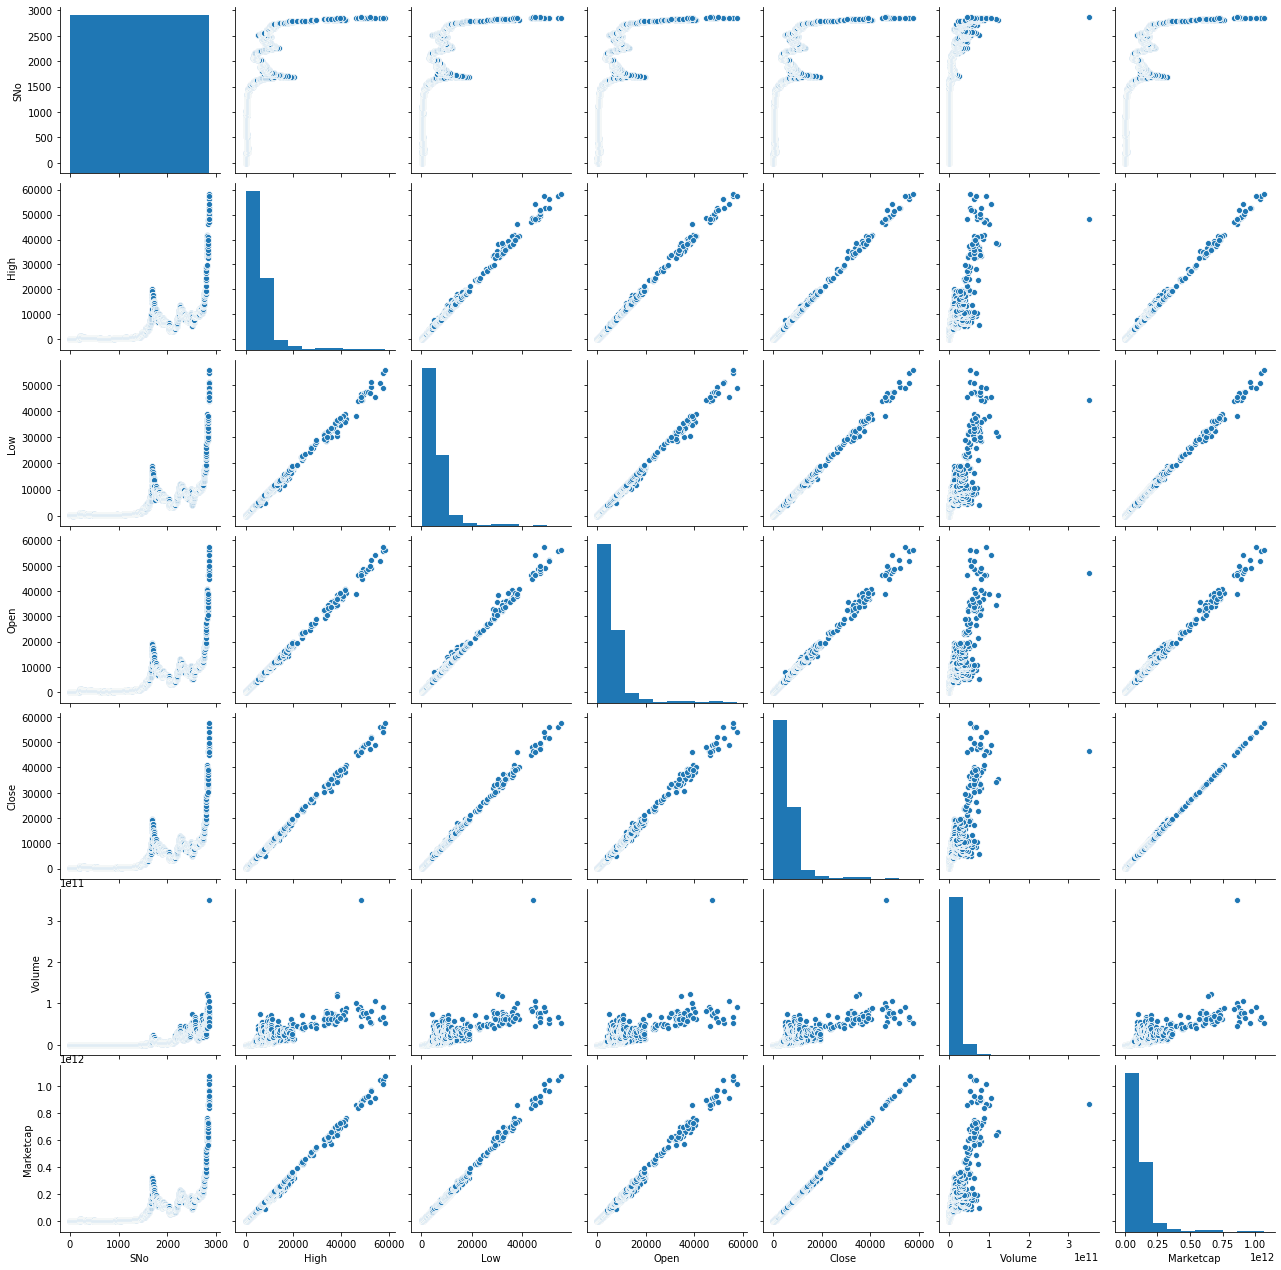

In [6]:
sns.pairplot(df)

In [7]:
Date_Marketcap = df[['Date','Marketcap']]
Date_Marketcap.head()

,Date,Marketcap
0,2013-04-29,1.603769e+09
1,2013-04-30,1.542813e+09
2,2013-05-01,1.298955e+09
3,2013-05-02,1.168517e+09
4,2013-05-03,1.085995e+09


Text(0, 0.5, 'Marketcap')

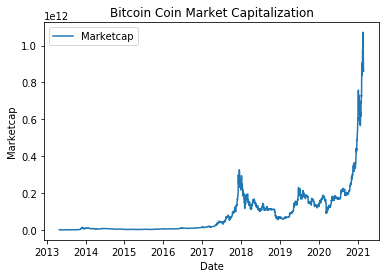

In [9]:
TimevsMarketcap = Date_Marketcap.set_index('Date')
TimevsMarketcap.plot()
plt.title('Bitcoin Coin Market Capitalization')
plt.xlabel('Date')
plt.ylabel('Marketcap')

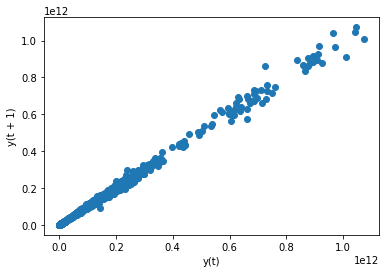

In [10]:
pd.plotting.lag_plot(df['Marketcap'])

In [11]:
Date_Close = df[['Date','Close']]
Date_Close.head()

,Date,Close
0,2013-04-29,144.539993
1,2013-04-30,139.000000
2,2013-05-01,116.989998
3,2013-05-02,105.209999
4,2013-05-03,97.750000


Text(0, 0.5, 'Close')

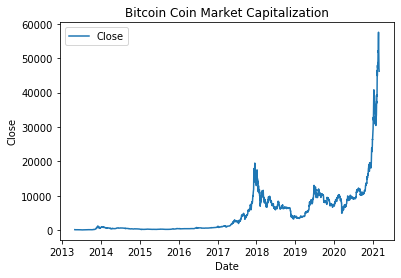

In [13]:
TimevsClose = Date_Close.set_index('Date')
TimevsClose.plot()
plt.title('Bitcoin Coin Market Capitalization')
plt.xlabel('Date')
plt.ylabel('Close')